###  "In The Name Of ALLAH"
# Computational Intelligence Lab Report - Lab 5 - Mr. Amini
## Seyed Mohammadsaleh Mirzatabatabaei(smsmt@aut.ac.ir) - 9623105 
---





## Pre-Report

---
> **RBF neural network model:**

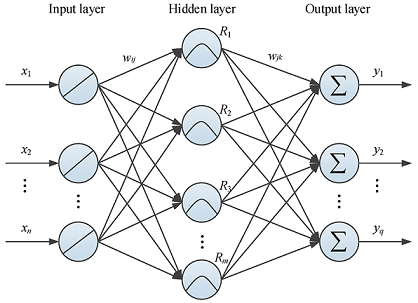

> **Difference between MLP and RBF:**

*   *MLP*: uses dot products (between inputs and weights) and sigmoidal activation functions (or other monotonic functions such as ReLU) and training is usually done through backpropagation for all layers (which can be as many as you want).
*   *RBF*: uses Euclidean distances (between inputs and weights, which can be viewed as centers) and (usually) Gaussian activation functions (which could be multivariate), which makes neurons more locally sensitive. RBF neural networks are good for novelty detection (if each neuron is centered on a training example, inputs far away from all neurons constitute novel patterns) but not so good at extrapolation. Finally, RBFs make it easier to grow new neurons during training.




## Report
---

### RBF neural network class

This code is entered in the lab class.

*   **class constructor:** set the centers and bias for the hidden layer RBF neurons with K-Mean clustering algorithm or given from input

*   **actFunc:** gaussian activation function
*   **RBF_layer:** hidden RBF layer which calculate gaussian(radial) based function neurons output given the input vector (x)
*   **fit:** trains the RBF neural network and finds the weights of the output layer and adjust them based on the output of the hidden RBF layer using matrix calculations
*   **predict:** give the result of entire RBF neural network after adjusting weights using hidden and ouput layer given input layer vector (x)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


class RBF:
  def __init__(self, x, y, neurons=2, **kwargs):
    if 'centers' in kwargs:
      self.centers = kwargs['centers']
    else:
      kmeans = KMeans(neurons)
      kmeans.fit(x)
      self.centers = kmeans.cluster_centers_

    if 'b' in kwargs:
      self.b = kwargs['b']
    else:
      self.b = 1
    self.x = x
    self.y = y

  def actFunc(self, x):
    return np.exp(-(x ** 2))

  def RBF_layer(self, x):
    n = np.array([[self.b * np.linalg.norm(x_row - center) for center in self.centers] for x_row in x])
    a = self.actFunc(n)
    a = np.insert(a, 0, np.ones(a.shape[0]), axis=1)
    return a

  def fit(self):
    a = self.RBF_layer(self.x)
    self.w = np.dot(np.dot(np.linalg.inv(np.dot(a.T, a)), a.T), y)

  def predict(self, x):
    return np.dot(self.RBF_layer(x), self.w)

### Sinus sample

Noisy sinus prediction sample with a RBF neural network (example of report file)

*   Adjust number of neurons and b to give more accurate result 



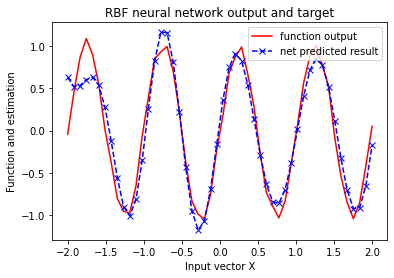

In [ ]:
# define data
NUM_SAMPLES = 50
x = np.linspace(-2, 2, NUM_SAMPLES)[:, np.newaxis]
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)[:, np.newaxis]
y = np.sin(2 * np.pi * x) + noise

# train RBF neural network
sinRBF = RBF(x, y, 10, b=2)
sinRBF.fit()

# plot result
plt.figure()
plt.plot(x, y, 'r-')
plt.plot(x, sinRBF.predict(x), 'b--x')
plt.legend(('function output','net predicted result'))
plt.title('RBF neural network output and target')
plt.xlabel('Input vector X')
plt.ylabel('Function and estimation')
plt.show()

### XOR sample

XOR gate prediction sample with a RBF neural network (example of lab class)




In [ ]:
# XOR logic gate input ouput
x = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([0, 0, 1, 1])

# train RBF neural network
xorRBF = RBF(x, y, centers = np.array([[0, 1], [1, 0]]), b = 1)
xorRBF.fit()

# print result
print("input:\n", x)
print("\npredicted result:\n", xorRBF.predict(x))

input:
 [[0 0]
 [1 1]
 [0 1]
 [1 0]]

predicted result:
 [3.55271368e-15 3.55271368e-15 1.00000000e+00 1.00000000e+00]


## Exercise
---
> **2- difference of two dataset**

For the first data set, a linear kernel can be used to separate the data. Also, two centers (radial kernel) can be used to separate the data.
For the second dataset, the use of a linear kernel is not appropriate at all and is unusable. For this type of data, the radial kernel and RBF network can be used to separate the data and make the separation operation much easier.

In general, single-layer perceptron networks can only perform linear separation, which is suitable for the first data set. Multilayer perceptron networks can perform more complex embedding, and RBF networks are suitable for when we want to do circular separation and estimate the data range in each group.



